In [1]:
from configs import *
import utils
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt
import numpy as np

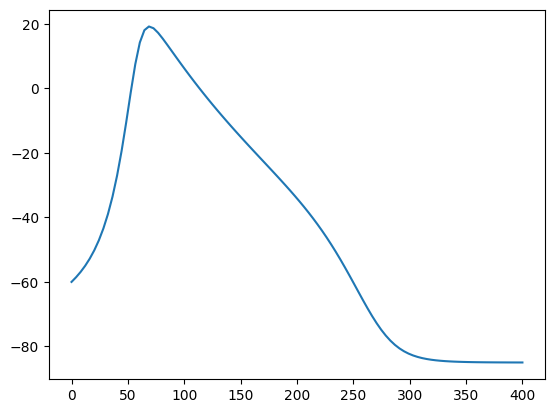

In [2]:
V, w = [], []
V_val, w_val = -60.0, 0.0

T = 400
NUM_STEPS = 100
DT = T/NUM_STEPS
t = 0.0
while t < T:
    V.append(V_val)
    w.append(w_val)
    V_val = V_val + DT * utils.ReparametrizedFitzHughNagumo.I_ion(V_val, w_val)
    w_val = w_val + DT * utils.ReparametrizedFitzHughNagumo.f(V_val, w_val)
    t += DT

plt.plot(np.linspace(0, T, len(V)), V)

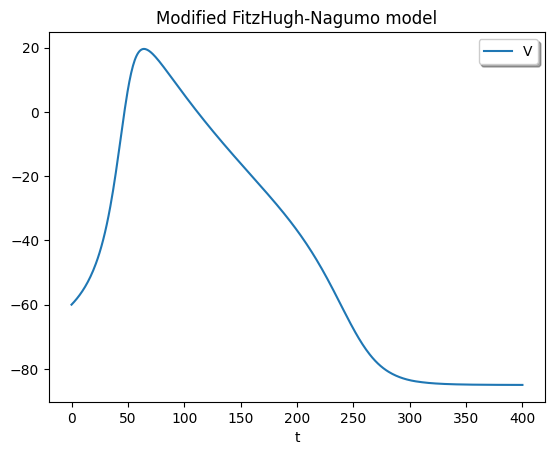

In [3]:
a = 0.13
b = 0.013
c1 = 0.26
c2 = 0.1
c3 = 1.0
V_AMP = V_PEAK - V_REST
V_TH = V_REST + a * V_AMP


def I_app(t):
    if t > 50 and t < 40:
        return V_AMP * 0.05
    else:
        return 0.0


def mfn(t, z):
    V, w = z
    return [
        utils.ReparametrizedFitzHughNagumo.I_ion(V, w)*C_M,
        utils.ReparametrizedFitzHughNagumo.f(V, w),
    ]


T = 400
V_0 = -60
w_0 = 0
time = np.linspace(0, T, 500)

sol = solve_ivp(mfn, [0, T], [V_0, w_0], method="DOP853", t_eval=time)

plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.legend(["V", "w"], shadow=True)
plt.title("Modified FitzHugh-Nagumo model")
plt.show()

Modified FitzHugh-Nagumo model:

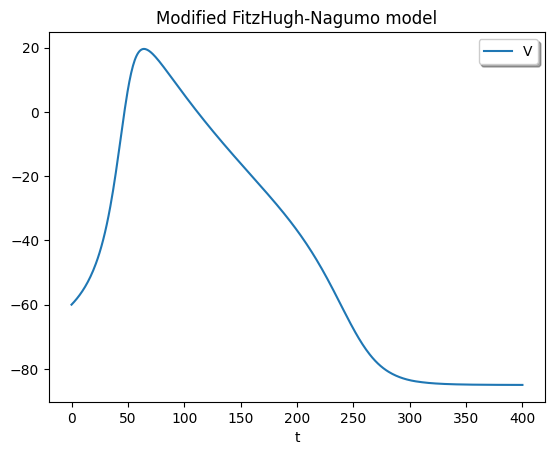

In [4]:
a = 0.13
b = 0.013
c1 = 0.26
c2 = 0.1
c3 = 1.0
V_AMP = V_PEAK - V_REST
V_TH = V_REST + a * V_AMP


def I_app(t):
    if t > 50 and t < 40:
        return V_AMP * 0.05
    else:
        return 0.0


def mfn(t, z):
    V, w = z
    return [
        c1 / V_AMP**2 * (V - V_REST) * (V - V_TH) * (V_PEAK - V)
        - c2 / V_AMP * (V - V_REST) * w
        + I_app(t),
        b * (V - V_REST - c3 * w),
    ]


T = 400
V_0 = -60
w_0 = 0
time = np.linspace(0, T, 500)

sol = solve_ivp(mfn, [0, T], [V_0, w_0], method="DOP853", t_eval=time)

plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.legend(["V", "w"], shadow=True)
plt.title("Modified FitzHugh-Nagumo model")
plt.show()

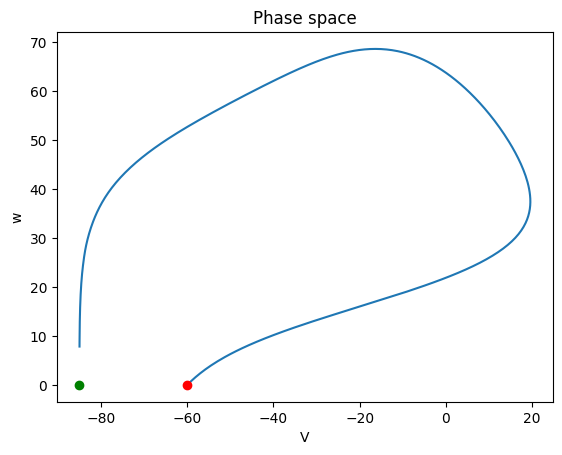

Finalni V i w su: -84.98463580520976 7.838474443968039


In [5]:
plt.plot(sol.y[0], sol.y[1])
plt.plot(V_REST, 0, "o", color="green")
plt.plot(V_0, w_0, "o", color="red")
plt.xlabel("V")
plt.ylabel("w")
plt.title("Phase space")
plt.show()
print("Finalni V i w su:", sol.y[0][-1], sol.y[1][-1])

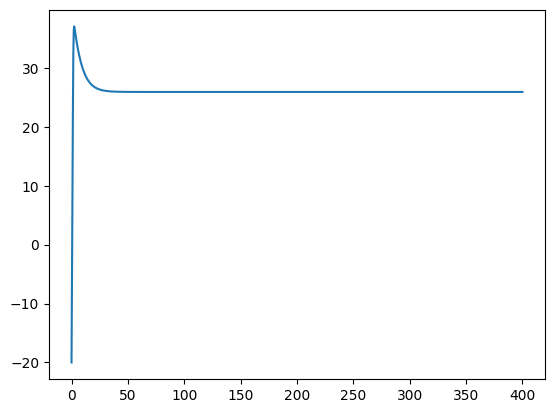

In [6]:
V, w = [], []
V_val, w_val = -20.0, 1.0


def I_app(t):
    if t > 50 and t < 40:
        return V_AMP * 0.05
    else:
        return 0.0


T = 400
t = 0.0
while t < T:
    V.append(V_val)
    w.append(w_val)
    V_val = (
        V_val
        + DT * c1 / V_AMP**2 * (V_val - V_REST) * (V_val - V_TH) * (V_PEAK - V_val)
        - c2 / V_AMP * (V_val - V_REST) * w_val
        + I_app(t)
    )
    w_val = w_val + DT * b * (V_val - V_REST - c3 * w_val)
    t += T / 1000

plt.plot(np.linspace(0, T, 1001), V)